# Lab | Pandas

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv

The data includes information such as customer ID, state, gender, education, income, and other variables that can be used to perform various analyses.

Throughout the lab, we will be using the pandas library in Python to manipulate and analyze the data. Pandas is a powerful library that provides various data manipulation and analysis tools, including the ability to load and manipulate data from a variety of sources, including CSV files.

### Data Description

- Customer - Customer ID

- ST - State where customers live

- Gender - Gender of the customer

- Education - Background education of customers 

- Customer Lifetime Value - Customer lifetime value(CLV) is the total revenue the client will derive from their entire relationship with a customer. In other words, is the predicted or calculated value of a customer over their entire duration as a policyholder with the insurance company. It is an estimation of the net profit that the insurance company expects to generate from a customer throughout their relationship with the company. Customer Lifetime Value takes into account factors such as the duration of the customer's policy, premium payments, claim history, renewal likelihood, and potential additional services or products the customer may purchase. It helps insurers assess the long-term profitability and value associated with retaining a particular customer.

- Income - Customers income

- Monthly Premium Auto - Amount of money the customer pays on a monthly basis as a premium for their auto insurance coverage. It represents the recurring cost that the insured person must pay to maintain their insurance policy and receive coverage for potential damages, accidents, or other covered events related to their vehicle.

- Number of Open Complaints - Number of complaints the customer opened

- Policy Type - There are three type of policies in car insurance (Corporate Auto, Personal Auto, and Special Auto)

- Vehicle Class - Type of vehicle classes that customers have Two-Door Car, Four-Door Car SUV, Luxury SUV, Sports Car, and Luxury Car

- Total Claim Amount - the sum of all claims made by the customer. It represents the total monetary value of all approved claims for incidents such as accidents, theft, vandalism, or other covered events.


External Resources: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

## Challenge 1: Understanding the data

In this challenge, you will use pandas to explore a given dataset. Your task is to gain a deep understanding of the data by analyzing its characteristics, dimensions, and statistical properties.

- Identify the dimensions of the dataset by determining the number of rows and columns it contains.
- Determine the data types of each column and evaluate whether they are appropriate for the nature of the variable. You should also provide suggestions for fixing any incorrect data types.
- Identify the number of unique values for each column and determine which columns appear to be categorical. You should also describe the unique values of each categorical column and the range of values for numerical columns, and give your insights.
- Compute summary statistics such as mean, median, mode, standard deviation, and quartiles to understand the central tendency and distribution of the data for numerical columns. You should also provide your conclusions based on these summary statistics.
- Compute summary statistics for categorical columns and providing your conclusions based on these statistics.

In [3]:
# Your code here
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv")
df.head()

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323


In [4]:
df.shape

(4008, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4008 entries, 0 to 4007
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer                   1071 non-null   object 
 1   ST                         1071 non-null   object 
 2   GENDER                     954 non-null    object 
 3   Education                  1071 non-null   object 
 4   Customer Lifetime Value    1068 non-null   object 
 5   Income                     1071 non-null   float64
 6   Monthly Premium Auto       1071 non-null   float64
 7   Number of Open Complaints  1071 non-null   object 
 8   Policy Type                1071 non-null   object 
 9   Vehicle Class              1071 non-null   object 
 10  Total Claim Amount         1071 non-null   float64
dtypes: float64(3), object(8)
memory usage: 344.6+ KB


In [6]:
df.nunique()
# catergorical variables: ST, GENDER, Education, Policy Type, Vehicle Class
# numerical: 'should be' customer lifetime value, income, monthly premium auto, total claim amount, 'should be' number of open complaints
# variable 'customer lifetime value' has a wrong datatype --> therefore could not be analysed, until it is transformed. Q: does it mean we need to get rif of '%', then use .astype(float64) to convert this data ?

# the whole dataset has 4008 rows, however, much lower number of unique values in column 'customer', 'customer lifetime value', 'income', 'monthly premium auto', 'total claim amount'
# --> indicating that there are lots of null value in this dataset, shown by df.info()

Customer                     1071
ST                              8
GENDER                          5
Education                       6
Customer Lifetime Value      1027
Income                        774
Monthly Premium Auto          132
Number of Open Complaints       6
Policy Type                     3
Vehicle Class                   6
Total Claim Amount            761
dtype: int64

In [7]:
df.dtypes

Customer                      object
ST                            object
GENDER                        object
Education                     object
Customer Lifetime Value       object
Income                       float64
Monthly Premium Auto         float64
Number of Open Complaints     object
Policy Type                   object
Vehicle Class                 object
Total Claim Amount           float64
dtype: object

In [8]:
df['ST'].unique() 
# there is NaN/null value in dataset for this variable

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

In [9]:
df['GENDER'].unique()
# There is NaN/null value, and inconsistency in depecting gender of this variable

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [10]:
df['Education'].unique()

array(['Master', 'Bachelor', 'High School or Below', 'College',
       'Bachelors', 'Doctor', nan], dtype=object)

In [11]:
df['Customer Lifetime Value'].unique()
# this variable datatype is object. However, indicating by the values, this variable should be continuous numerical data (float64), and get rid of character '%'

array([nan, '697953.59%', '1288743.17%', ..., '2031499.76%', '323912.47%',
       '899704.02%'], dtype=object)

In [12]:
df['Number of Open Complaints'].unique()
# not sure I understand this data, as should it be just an integer represents the number of opened complaints?

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan],
      dtype=object)

In [13]:
df['Policy Type'].unique()

array(['Personal Auto', 'Corporate Auto', 'Special Auto', nan],
      dtype=object)

In [14]:
df['Vehicle Class'].unique()

array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car', nan], dtype=object)

In [15]:
df.describe()

,Income,Monthly Premium Auto,Total Claim Amount
count,1071.000000,1071.000000,1071.000000
mean,39295.701214,193.234360,404.986909
std,30469.427060,1601.190369,293.027260
min,0.000000,61.000000,0.382107
25%,14072.000000,68.000000,202.157702
50%,36234.000000,83.000000,354.729129
75%,64631.000000,109.500000,532.800000
max,99960.000000,35354.000000,2893.239678


In [16]:
num_var = ["Income", "Monthly Premium Auto", "Total Claim Amount"]
print(df[num_var].median())
print(df[num_var].mode())
print(df[num_var].var())


Income                  36234.000000
Monthly Premium Auto       83.000000
Total Claim Amount        354.729129
dtype: float64
   Income  Monthly Premium Auto  Total Claim Amount
0     0.0                  65.0               321.6
Income                  9.283860e+08
Monthly Premium Auto    2.563811e+06
Total Claim Amount      8.586498e+04
dtype: float64


# insights into numerical variables:
1. Income: 
 * the minimum income of customers is 0 (which is weird?)
 * the maximum income of customers is 99960.0 (no currency)
 * the average income of customers is 39295.7
 * the median income of customers is 36234.0, which is lower than the average income --> indicating that there are some extreme high income in the dataset, supported by the max income of 99960.0
 * interestingly, the most observed income in this dataset is 0.0

2. Monthly Premium Auto (MPA):
 * the minimum MPA is 61 
 * the maximum MPA is 35354.0 
 * the average MPA is 193.23
 * the median MPA is 83.0,which is lower than the average MPA --> indicating that there are some extreme high MPA in the dataset, supported by the max MPA of 35354.0
 * the most observed MPA in this dataset is 65
 
3. Total Claim Amount (TCA):
 * the minimum TCA is 0.38
 * the maximum TCA is 2893.24 
 * the average TCA is 404.99
 * the median TCA is 354.73,which is lower than the average MPA --> indicating that there are outliers in the dataset, supported by the max TCA of 404.9
 * the most observed TCA in this dataset is 321.6
In general, these above variables have a large variance, standard deviation, and range --> indicating a wide range of values and huge variability in these 3 variables.

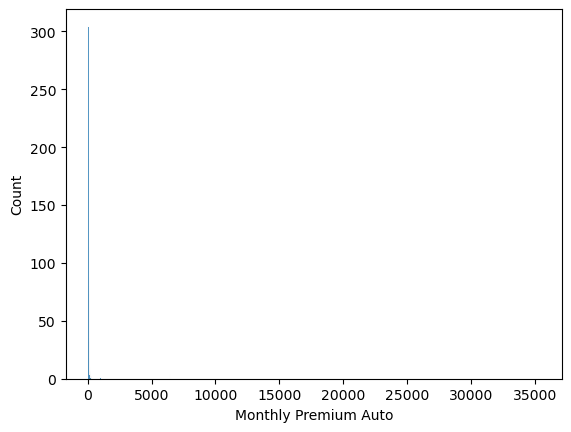

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#df['Monthly Premium Auto'].unique()

sns.histplot(x = 'Monthly Premium Auto', data = df)
plt.show()

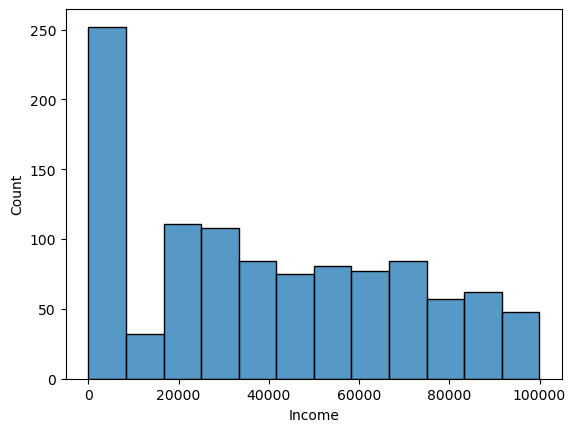

In [18]:
sns.histplot(x = 'Income', data = df)
plt.show()

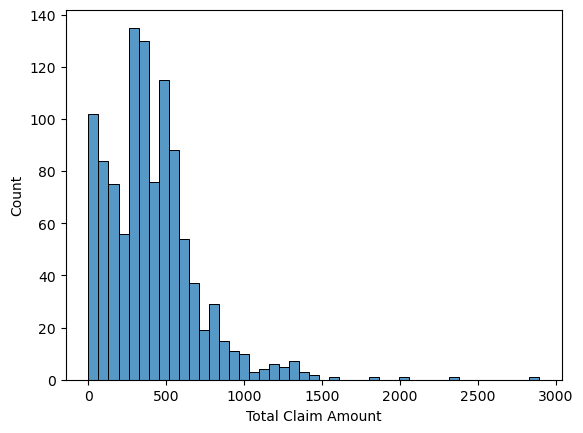

In [19]:
sns.histplot(x = 'Total Claim Amount', data = df)
plt.show()

In [20]:
df['ST'].value_counts()

Oregon        320
California    211
Arizona       186
Cali          120
Nevada         98
Washington     81
WA             30
AZ             25
Name: ST, dtype: int64

In [21]:
df['GENDER'].value_counts()

F         457
M         413
Male       39
female     28
Femal      17
Name: GENDER, dtype: int64

In [22]:
df['Education'].value_counts()

Bachelor                324
College                 313
High School or Below    296
Master                   94
Doctor                   37
Bachelors                 7
Name: Education, dtype: int64

In [23]:
df['Number of Open Complaints'].value_counts()

1/0/00    830
1/1/00    138
1/2/00     50
1/3/00     34
1/4/00     13
1/5/00      6
Name: Number of Open Complaints, dtype: int64

In [24]:
df['Policy Type'].value_counts()

Personal Auto     780
Corporate Auto    234
Special Auto       57
Name: Policy Type, dtype: int64

In [25]:
df['Vehicle Class'].value_counts()

Four-Door Car    576
Two-Door Car     205
SUV              199
Sports Car        57
Luxury SUV        20
Luxury Car        14
Name: Vehicle Class, dtype: int64

# insights into categorical variables:
general comment: since there are many null value and inconsistency in recording data of this dataset. All the insights are actually not really reliable. Categorical variable "Vehicle Class" has overlap features among values (Two-Door Car vs Sports Car for example). Only variable "Policy Type" has data records that are good  enough to be analysed. 
1. ST:
 * inconsistency in record ST data: California vs. Cali, fullname vs abbreviation (Oregon, Nevada... vs WA, AZ)
 * majority customers are from Oregon, the least customer comes from AZ (whatever AZ mean, Arizona?)

2. GENDER:
 * There are more female customers than male

3. Education:
 * Majority of customer has an education of bachelor and below (as College, highschool or below)
 * small number of customer has either master or doctor education

4. Number of open complaints:
 * majority of customer has 1/0/00 type of complaint (does it equivalent to 0 complaint?)
 
5. Policy Type:
 * There are 3 types of policy: Personal Auto, Corporate Auto, and Special Auto
 * Majority of customer has Personal Auto policy, while the minority of customer has Special Auto policy
 
6. Vehicle class:
 * most customer has a four-door car, minimum customer has a luxury car or luxury SUV.
 * is sports car a luxury car? 
 --> due to ambiguous in definition of values, it is impossible to draw any insights or conlusion about the analysis

## Challenge 2: analyzing the data

### Exercise 1

The marketing team wants to know the top 5 less common customer locations. Create a pandas Series object that contains the customer locations and their frequencies, and then retrieve the top 5 less common locations in ascending order.

In [34]:
# Your code here
# Challenge 2 -  Exercise 1
df['ST'].value_counts(ascending = True).head(5)

AZ             25
WA             30
Washington     81
Nevada         98
Cali          120
Name: ST, dtype: int64

### Exercise 2

The sales team wants to know the total number of policies sold for each type of policy. Create a pandas Series object that contains the policy types and their total number of policies sold, and then retrieve the policy type with the highest number of policies sold.

*Hint:*
- *Using value_counts() method simplifies this analysis.*
- *Futhermore, there is a method that returns the index of the maximum value in a column or row.*


In [35]:
# Your code here

print(df['Policy Type'].value_counts())

policy_type = df['Policy Type'].value_counts().idxmax()
print('The policy with highest sold number is', policy_type)

Personal Auto     780
Corporate Auto    234
Special Auto       57
Name: Policy Type, dtype: int64
The policy with highest sold number is Personal Auto


### Exercise 3

The sales team wants to know if customers with Personal Auto have a lower income than those with Corporate Auto. How does the average income compare between the two policy types?

- Use *loc* to create two dataframes: one containing only Personal Auto policies and one containing only Corporate Auto policies.
- Calculate the average income for each policy.
- Print the results.

In [45]:
# Your code here

df_personal_auto_income = df.loc[df['Policy Type'] == "Personal Auto", ["Income"]]
print(df_personal_auto_income)
per_au_income = df_personal_auto_income.mean().get("Income")
type(df_personal_auto_income.mean())
df_corporate_auto_income = df.loc[df['Policy Type'] == "Corporate Auto", ["Income"]]
print(df_corporate_auto_income)
cor_au_income = df_corporate_auto_income.mean().get("Income")


if per_au_income > cor_au_income:
    print('the average income of customer with personal auto policy ', per_au_income, ' is higher than the average income of customer with corporate policy', cor_au_income)
else:
    print ('the average income of customer with personal auto policy ', per_au_income, ' is lower than the average income of customer with corporate policy', cor_au_income)



       Income
0         0.0
1         0.0
2     48767.0
4     36357.0
5     62902.0
...       ...
1065  69417.0
1066  38644.0
1067  63209.0
1068  16061.0
1070  54230.0

[780 rows x 1 columns]
       Income
3         0.0
6     55350.0
7         0.0
8     14072.0
12    77026.0
...       ...
1045  94389.0
1050  51978.0
1052  86721.0
1056  89451.0
1059  54193.0

[234 rows x 1 columns]
the average income of customer with personal auto policy  38180.69871794872  is lower than the average income of customer with corporate policy 41390.31196581197


### Bonus: Exercise 4


Your goal is to identify customers with a high policy claim amount.

Instructions:

- Review again the statistics for total claim amount to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount data. 

*Note: When analyzing data, we often want to focus on certain groups of values to gain insights. Percentiles are a useful tool to help us define these groups. A percentile is a measure that tells us what percentage of values in a dataset are below a certain value. For example, the 75th percentile represents the value below which 75% of the data falls. Similarly, the 25th percentile represents the value below which 25% of the data falls. When we talk about the top 25%, we are referring to the values that fall above the 75th percentile, which represent the top quarter of the data. On the other hand, when we talk about the bottom 25%, we are referring to the values that fall below the 25th percentile, which represent the bottom quarter of the data. By focusing on these groups, we can identify patterns and trends that may be useful for making decisions and taking action.*

*Hint: look for a method that gives you the percentile or quantile 0.75 and 0.25 for a Pandas Series.*

*Hint 2: check `Boolean selection according to the values of a single column` in https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9*

In [29]:
# Your code here

df_policy_claim = df.loc[:, ['Customer', 'Total Claim Amount']]
df_policy_claim



,Customer,Total Claim Amount
0,RB50392,2.704934
1,QZ44356,1131.464935
2,AI49188,566.472247
3,WW63253,529.881344
4,GA49547,17.269323
...,...,...
4003,NaN,NaN
4004,NaN,NaN
4005,NaN,NaN
4006,NaN,NaN


In [30]:
df_policy_claim.describe()

,Total Claim Amount
count,1071.000000
mean,404.986909
std,293.027260
min,0.382107
25%,202.157702
50%,354.729129
75%,532.800000
max,2893.239678


In [31]:
a = df.describe()
print(a)
total_claim_amount_75 = a.loc['75%', "Total Claim Amount"]

             Income  Monthly Premium Auto  Total Claim Amount
count   1071.000000           1071.000000         1071.000000
mean   39295.701214            193.234360          404.986909
std    30469.427060           1601.190369          293.027260
min        0.000000             61.000000            0.382107
25%    14072.000000             68.000000          202.157702
50%    36234.000000             83.000000          354.729129
75%    64631.000000            109.500000          532.800000
max    99960.000000          35354.000000         2893.239678


In [32]:
customer_higher_policy_claim = df[df["Total Claim Amount"] >= total_claim_amount_75]
customer_higher_policy_claim

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
17,OE15005,Cali,NaN,College,394524.16%,28855.0,101.0,1/0/00,Personal Auto,SUV,647.442031
23,TZ98966,Nevada,NaN,Bachelor,245019.10%,0.0,73.0,1/3/00,Corporate Auto,Four-Door Car,554.376763
26,US89481,California,NaN,Bachelor,394637.21%,0.0,111.0,1/0/00,Personal Auto,Four-Door Car,799.200000
...,...,...,...,...,...,...,...,...,...,...,...
1059,YG44474,Oregon,M,College,1401472.13%,54193.0,117.0,1/0/00,Corporate Auto,SUV,720.752945
1061,RY92647,Cali,F,Bachelor,1050677.17%,0.0,92.0,1/0/00,Personal Auto,Four-Door Car,546.524896
1068,GS98873,Arizona,F,Bachelor,323912.47%,16061.0,88.0,1/0/00,Personal Auto,Four-Door Car,633.600000
1069,CW49887,California,F,Master,462680.11%,79487.0,114.0,1/0/00,Special Auto,SUV,547.200000


In [54]:
print(customer_higher_policy_claim.shape)



(273, 11)


In [33]:
customer_higher_policy_claim.value_counts('ST')

ST
Oregon        93
California    67
Arizona       42
Nevada        29
Cali          21
AZ            11
WA            10
dtype: int64

In [46]:
customer_higher_policy_claim.value_counts('GENDER')

GENDER
F         118
M         103
Male       17
female      5
Femal       2
dtype: int64

In [48]:
customer_higher_policy_claim.value_counts('Education')

Education
High School or Below    90
Bachelor                86
College                 84
Master                   9
Doctor                   4
dtype: int64

In [49]:
customer_higher_policy_claim.value_counts('Number of Open Complaints')

Number of Open Complaints
1/0/00    213
1/1/00     30
1/2/00     12
1/3/00     12
1/4/00      4
1/5/00      2
dtype: int64

In [50]:
customer_higher_policy_claim.value_counts('Policy Type')

Policy Type
Personal Auto     195
Corporate Auto     65
Special Auto       13
dtype: int64

In [47]:
customer_higher_policy_claim.value_counts('Vehicle Class')

Vehicle Class
SUV              105
Four-Door Car     74
Two-Door Car      33
Sports Car        31
Luxury SUV        19
Luxury Car        11
dtype: int64

In [51]:
customer_higher_policy_claim.describe()

,Income,Monthly Premium Auto,Total Claim Amount
count,273.000000,273.000000,273.000000
mean,24106.545788,163.000000,774.005353
std,27542.717560,613.645376,291.304731
min,0.000000,63.000000,532.800000
25%,0.000000,99.000000,595.200000
50%,18846.000000,113.000000,673.342650
75%,44897.000000,133.000000,844.481918
max,99316.000000,10202.000000,2893.239678


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print(type(customer_higher_policy_claim))

sns.histplot(x = 'Income', df = customer_higher_policy_claim.dropna(subset = ["Income"])) 
plt.show()

print(customer_higher_policy_claim['Income'])

<class 'pandas.core.frame.DataFrame'>


ValueError: Could not interpret value `Income` for parameter `x`

In [67]:
print(customer_higher_policy_claim['Income'].dtype)

float64


In [68]:
non_numeric_values = customer_higher_policy_claim['Income'].loc[~customer_higher_policy_claim['Income'].apply(pd.to_numeric, errors='coerce').notna()]
print(non_numeric_values)


Series([], Name: Income, dtype: float64)
